In [1]:
import matplotlib as mpl

import os
import glob
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import cPickle as pkl
import matplotlib.colors as mcolors

In [2]:
import utils as util
import process_datafiles as procd

import assign_phase as ph
import scipy.stats as spstats

utils.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-package

In [18]:
def combine_cohorts_to_dataframe(metadata, cohort_list=[], excluded_animals=[]):
    
    if cohort_list is None or len(cohort_list) == 0:
        cohort_list = sorted(metadata['cohort'].unique(), key=util.natural_keys)
    print("combining data from %i cohorts:" % len(cohort_list), cohort_list)
    
    dflist = []
    for (cohort, animalid), animal_meta in metadata[metadata['cohort'].isin(cohort_list)].groupby(['cohort', 'animalid']):
        if animalid in excluded_animals:
            print("... skipping %s" % animalid)
            continue

            
        a_df, _ = procd.get_animal_df(animalid, paradigm, metadata, create_new=False)
        
        if a_df is None:
            print("... no DF found: %s" % animalid)
            continue
        a_df = a_df.reset_index(drop=True)

        #included_sessions = check_against_manual_sorting(animalid, phase)
        #currdf = a_df[a_df['session'].isin(included_sessions)].copy()
    
        #### Update some sorting values
        a_df['animalid'] = [animalid for _ in np.arange(0, len(a_df))]
        a_df['cohort'] = [cohort for _ in np.arange(0, len(a_df))]
        a_df['sessionid'] = ['%s%s' % (sess, sfx) for sess, sfx in zip(a_df['session'], a_df['suffix'])]
        
        dflist.append(a_df)
        
    df = pd.concat(dflist, axis=0).reset_index(drop=True)

    ignore_vars = ['Flag', 'action', 'alpha_multiplier', 'size_x', 'size_y']
    ignore_cols = [f for f in df.columns if any([desc in f for desc in ignore_vars])]
    keep_cols = [f for f in df.columns if f not in ignore_cols]
    df = df[keep_cols]

    return df

# Load data

In [19]:
rootdir = '/n/coxfs01/behavior-data'
paradigm = 'threeport'

processed_dir = os.path.join(rootdir, paradigm, 'processed')

metadata = util.get_metadata(paradigm, rootdir=rootdir, filtered=False, create_meta=False)


Loading existing metadata: /n/coxfs01/behavior-data/threeport/metadata.pkl


In [20]:
#### Get all animals in specified cohorts
#cohort_list = ['AK', 'AL', 'AM']
#cohort_list = ['AG', 'AJ']
cohort_list = ['AK', 'AL', 'AM', 'AN'] #, 'AO']
excluded_animals = ['AM9', 'AM10', 'AM11', 'AM12']
cohortdf = combine_cohorts_to_dataframe(metadata, cohort_list=cohort_list, excluded_animals=excluded_animals)


('combining data from 4 cohorts:', ['AK', 'AL', 'AM', 'AN'])
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... skipping AM10
... skipping AM11
... skipping AM12
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... skipping AM9
... 

/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



# Select phase

In [6]:
_ = ph.print_phase_lookup()

{   -1: 'other',
    0: 'always_reward',
    1: 'default',
    2: 'size',
    3: 'depth_rotation',
    4: 'cross',
    5: 'size_and_depth_rotation',
    6: 'depth_and_planar_rotation',
    7: 'morph',
    8: 'newstimuli',
    9: 'fine_grained_size',
    10: 'fine_grained_depth_rotation',
    11: 'fine_grained_size_and_depth_rotation',
    12: 'transparency',
    13: 'clutter',
    14: 'light_position',
    15: 'x_rotation',
    16: 'position',
    17: 'punishcycle_long',
    18: 'punishcycle_short',
    19: 'no_min_RT'}


In [ ]:
# phaseinfo = ph.get_phase_data('AM', create_new=False)


In [ ]:
# phaseinfo[( phaseinfo['animalid']=='AM8') & (phaseinfo['phase']==1)]

In [21]:
#### Select phase to analyze
curr_phase = 1
print(cohort_list)
print(sorted(cohortdf['animalid'].unique(), key=util.natural_keys))

['AK', 'AL', 'AM', 'AN']
['AK1', 'AK2', 'AK3', 'AK4', 'AK5', 'AK6', 'AK7', 'AK8', 'AK9', 'AK10', 'AK11', 'AK12', 'AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'AL7', 'AL8', 'AL9', 'AL10', 'AL11', 'AL12', 'AL13', 'AL14', 'AL15', 'AL16', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'AM6', 'AM7', 'AM8', 'AN1', 'AN2', 'AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8']


In [22]:
#### Get data for current phase
df_ = []
for cohort in cohort_list: #['AL']:

    #### Load phase info for cohort
    phaseinfo = ph.get_phase_data(cohort, create_new=False)

    #### Get phase infor for current phase
    curr_phaseinfo =  phaseinfo[phaseinfo['phase']==curr_phase]
    #print('Cohort %s: found phases' % cohort, phaseinfo['phase'].unique())

    #### Get datafiles for current phase
    datafiles_in_phase = [s for s, g in curr_phaseinfo.groupby(['animalid', 'session', 'suffix'])]

    #### Combine data for phase
    dlist = [g for s, g in cohortdf.groupby(['animalid', 'session', 'suffix']) if s in datafiles_in_phase]
    
    if len(dlist) > 0:
        tmpdf = pd.concat(dlist, axis=0).reset_index(drop=True)
        tmpdf['cohort'] = [cohort for _ in np.arange(0, len(tmpdf))]
        tmpdf['objectid'] = [int(i) for i in tmpdf['object']]
        df_.append(tmpdf)

df = pd.concat(df_, axis=0).reset_index(drop=True)

Loading existing metadata: /n/coxfs01/behavior-data/threeport/metadata.pkl
... loading phase data...
/n/coxfs01/behavior-data/threeport/processed/meta/phases_AK.pkl
[ 1  2  3  5 -1 12  0 16]
       animalid  cohort  datasource  session  suffix  protocol  experiment
phase                                                                     
-1           16      16          16       16      16        16          16
 0           17      17          17       17      17        17          17
 1          134     134         134      134     134       134         134
 2           28      28          28       28      28        28          28
 3           47      47          47       47      47        47          47
 5          944     944         944      944     944       944         944
 12          67      67          67       67      67        67          67
 16           5       5           5        5       5         5           5
Loading existing metadata: /n/coxfs01/behavior-data/threepo

In [23]:
print("Cohort list:", cohort_list)
print("Phase:", curr_phase)

print("Animal list:", sorted(df['animalid'].unique(), key=util.natural_keys))


('Cohort list:', ['AK', 'AL', 'AM', 'AN'])
('Phase:', 1)
('Animal list:', ['AK1', 'AK2', 'AK3', 'AK4', 'AK5', 'AK6', 'AK7', 'AK8', 'AK9', 'AK10', 'AK11', 'AK12', 'AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'AL7', 'AL8', 'AL9', 'AL10', 'AL11', 'AL12', 'AL13', 'AL14', 'AL15', 'AL16', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'AM6', 'AM7', 'AM8', 'AN1', 'AN2', 'AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8'])


In [25]:
object_ids = df['objectid'].unique()
animal_ids = df['animalid'].unique()

no_feedback_flag = len(df[df['no_feedback']==True])>0
print(no_feedback_flag)
no_fb = {}

False


# Create output dir

In [26]:
outdir = os.path.join(processed_dir, 'basic-training') #, 'phase-%i' % curr_phase, 'performance')
if not os.path.exists(outdir):
    print("making dir")
    os.makedirs(outdir)
print(outdir)

making dir
/n/coxfs01/behavior-data/threeport/processed/basic-training


# Create heatmaps

In [27]:
from matplotlib.patches import Rectangle

def draw_no_feedback(ax, curr_no_fb, defaults, seaborn=True, lw=2):

    default_size = defaults['size']
    default_depth_rotation = defaults['depth_rotation']
    default_planar_rotation = defaults['planar_rotation']

    expected_sizes = defaults['expected_sizes']
    expected_drots = defaults['expected_depth_rotations']

    offset = 0 if seaborn else 0.5

    # Draw default box
    default_size_ix = list(expected_sizes).index(default_size)
    default_drot_ix = list(expected_drots).index(default_depth_rotation)
    ax.add_patch(Rectangle((default_drot_ix-offset, default_size_ix-offset), 1, 1, 
                           fill=False, edgecolor='forestgreen', lw=lw, label='default'))
    
    if len(curr_no_fb) > 0:
        # Draw no feedback box
        nofb_size_min = min([f[0] for f in curr_no_fb])
        nofb_size_max = max([f[0] for f in curr_no_fb])
        nofb_drot_min = min([f[1] for f in curr_no_fb])
        nofb_drot_max = max([f[1] for f in curr_no_fb])
        #print("size - no feedback: [%i, %i]" % (nofb_size_min, nofb_size_max))
        #print("dept rot - no feedback: [%i, %i]" % (nofb_drot_min, nofb_drot_max))
        fb_sz_ixs = (list(expected_sizes).index(nofb_size_min), list(expected_sizes).index(nofb_size_max))
        fb_drot_ixs = (list(expected_drots).index(nofb_drot_min), list(expected_drots).index(nofb_drot_max))

        n_fb_drot = fb_drot_ixs[1]-fb_drot_ixs[0]+1
        n_fb_sz = fb_sz_ixs[1]-fb_sz_ixs[0]+1

        ax.add_patch(Rectangle((fb_drot_ixs[0]-offset, fb_sz_ixs[0]-offset), n_fb_drot, n_fb_sz, 
                               fill=False, edgecolor='cornflowerblue', lw=lw, linestyle=':', label='no feedback'))

    return ax

In [28]:
def format_size_depth_ticks(ax, xvals=[], yvals=[], 
                            xmax=None, ymax=None,
                            minimal=True, seaborn=True):
    
    offset = 0.5 if seaborn else 0.
    
    if minimal:
        xmax = max(xvals) if xmax is None else xmax
        xtick_labels = [int(x) for x in xvals if x%xmax==0 ]
        xticks = [i+offset for i, x in enumerate(xvals) if x%xmax==0 ]
        ax.set_xticks(xticks)
        ax.set_xticklabels(xtick_labels)

        ymax = max(yvals) if ymax is None else ymax
        ytick_labels = [int(x) for x in yvals if x%ymax==0 ]
        yticks = [i+offset for i, x in enumerate(yvals) if x%ymax==0 ]
        ax.set_yticks(yticks)
        ax.set_yticklabels(ytick_labels, rotation=0)
    else:
        ax.set_xticks([i+offset for i in np.arange(0, len(xvals))])
        ax.set_xticklabels(xvals)

        ax.set_yticks([i+offset for i in np.arange(0, len(yvals))])
        ax.set_yticklabels(yvals)
    
    return ax

In [29]:
def update_fonts():

    # Font params
    font_params = {'legend.fontsize': 20, #'medium',
             'axes.labelsize': 24, #'x-large',
             'axes.titlesize': 24, #'x-large',
             'xtick.labelsize': 20, #'x-large',
             'ytick.labelsize': 20} #'x-large'}

    # font_params = {'legend.fontsize': 'medium',
    #          'axes.labelsize': 'medium',
    #          'axes.titlesize': 'medium',
    #          'xtick.labelsize': 'medium',
    #          'ytick.labelsize': 'medium'}
    pl.rcParams.update(font_params)


In [30]:
# combine two color maps for 0-50% and 50-100% as in the PNAS paper
colors1 = pl.cm.bone(np.linspace(0.95,0.0,128))
colors2 = pl.cm.hot(np.linspace(0.,0.95,128))
colors = np.vstack((colors1, colors2))
pnas_cmap = mcolors.LinearSegmentedColormap.from_list('pnas_map', colors)

# Select object colors
object_ids = [1,2]
col_list = sns.color_palette('colorblind', n_colors=len(object_ids))
object_colors = dict((k, c) for k, c in zip(object_ids, col_list))

# Font params
update_fonts()

dpi=150


In [18]:
defaults = ph.get_default_params(cohort)

default_size = defaults['size']
default_depth_rotation = defaults['depth_rotation']
default_planar_rotation = defaults['planar_rotation']

expected_sizes = defaults['expected_sizes']
expected_drots = defaults['expected_depth_rotations']

# default_size = 30
# default_depth_rotation = 0.
# default_planar_rotation = 0.

# if cohort in ['AL']:
#     expected_sizes = np.linspace(15, 40, 11.)
#     expected_drots = np.linspace(-60, 60, 25.)
#     default_size = 40
    
# elif cohort in ['AG']:
#     expected_sizes = np.linspace(15, 40, 6.)
#     expected_drots = np.linspace(-60, 60, 9.)


# expected_size_interval = np.diff(expected_sizes).mean()
# expected_drot_interval = np.diff(expected_drots).mean()


In [19]:
# sizes = sorted(np.unique([s for (o, d, s), _ in g.groupby(['object', 'depth_rotation', 'size'])]))
# objects = sorted(np.unique([o for (o, d, s), _ in g.groupby(['object', 'depth_rotation', 'size'])]))
# depth_rotations = sorted(np.unique([d for (o, d, s), _ in g.groupby(['object', 'depth_rotation', 'size'])]))

# print("Objects:", objects)
# print("Sizes:", sizes)
# print("Depth rotations:", depth_rotations)


# Format data for heatmaps

In [20]:
df['size'].unique()

array([30.])

In [22]:
df['object'] = df['object'].astype(int)

In [23]:
object_ids = df['object'].unique()
dict((animalid, dict((k, []) for k in object_ids)) for animalid in df['animalid'].unique())

animal_ids = df['animalid'].unique()
animal_ids

array(['AG1', 'AG2', 'AG5', 'AG6', 'AG7', 'AG8', 'AJ1', 'AJ12', 'AJ4',
       'AJ5'], dtype=object)

#### Select which features/feature values for col/rows

In [24]:
if curr_phase in [4, 5]:
    feature_list = ['size', 'depth_rotation']
elif curr_phase == 6:
    feature_list = ['size', 'depth_rotation', 'rotation']
    
    expected_prots = sorted(df['rotation'].unique())
for feature in feature_list:
    print(feature, sorted(df[feature].unique()))

if curr_phase in [4, 5]:
    col_values = expected_drots
    row_values = expected_sizes
    
    col_feature = 'depth_rotation'
    row_feature='size'
    
    ymax=5
    xmax=60
    
elif curr_phase == 6:
    col_values = expected_prots
    row_values = expected_drots
    
    col_feature = 'rotation'
    row_feature='depth_rotation'
    
    ymax=20
    xmax=20

('size', [30.0])
('depth_rotation', [-60, -45, -30, -15, 0, 15, 30, 45, 60])
('rotation', [-165.0, -150.0, -135.0, -120.0, -105.0, -90.0, -75.0, -60.0, -45.0, -30.0, -15.0, 0.0, 15.0, 30.0, 45.0, 60.0, 75.0, 90.0, 105.0, 120.0, 135.0, 150.0, 165.0, 180.0])


In [25]:
no_feedback_flag = len(df[df['no_feedback']==True])>0
no_feedback_flag

False

In [26]:
feature_list

['size', 'depth_rotation', 'rotation']

In [27]:
object_ids = df['object'].unique()
HMAPS = dict((animalid, dict((k, []) for k in object_ids)) for animalid in df['animalid'].unique())
no_feedback = {}

    
dlist = []
i=0
for (animalid, session, sfx), agroup in df.groupby(['animalid', 'session', 'suffix']):
    
    if curr_phase in [4, 5] and no_feedback_flag is True:
        no_fb = agroup[agroup['no_feedback']==True][feature_list]
        no_fb_configs = list(set([(s, d) for s, d, in zip(no_fb[row_feature].values, no_fb[col_feature].values)]))
        no_feedback[animalid] = no_fb_configs

    for objectname, ogroup in agroup.groupby(['object']):
        hmap = np.ones((len(row_values), len(col_values))) * np.nan

        for (drot, sz), sgroup in ogroup.groupby([col_feature, row_feature]):

            n_trials = float(sgroup['outcome'].shape[0])
            perc_correct = len(sgroup[sgroup['outcome']=='success']) / n_trials
            mean_rt = sgroup['response_time'].mean()

            r_ix = list(row_values).index(sz)
            c_ix = list(col_values).index(drot)

            hmap[r_ix, c_ix] = perc_correct

            dlist.append(pd.DataFrame({'perc_correct': perc_correct,
                                       'avg_rt': mean_rt,
                                          'n_trials': n_trials,
                                          '%s' % row_feature: sz,
                                          '%s' % col_feature: drot,
                                          'objectid': objectname,
                                          'animalid': animalid,
                                          'session': session,
                                          'suffix': sfx}, index=[i]))
            i+=1

        HMAPS[animalid][objectname].append(hmap)

perfdf = pd.concat(dlist, axis=0)       

for animalid, hmap_d in HMAPS.items():
    HMAPS[animalid] = dict((k, np.dstack(v)) for k, v in hmap_d.items())


# Plot

In [28]:
# font_params = {'legend.fontsize': 'large',
#                  'axes.labelsize': 'large',
#                  'axes.titlesize': 'large',
#                  'xtick.labelsize': 'large',
#                  'ytick.labelsize': 'large'}
font_params = {'legend.fontsize': 22,
                 'axes.labelsize': 36,
                 'axes.titlesize': 22,
                 'xtick.labelsize': 22,
                 'ytick.labelsize': 22}

pl.rcParams.update(font_params)

dpi=150
lw = 5


# Set current output dir for figures

In [30]:
curr_outdir

'/n/coxfs01/behavior-data/threeport/processed/GJ/phase-6/performance'

In [47]:
# if curr_phase == 6:
#     curr_outdir = os.path.join(processed_dir, 'performance', 'inplane_rotations')
# else:
#     curr_outdir = os.path.join(processed_dir, 'performance')

# if not os.path.exists(os.path.join(curr_outdir, 'by_animal')):
#     os.makedirs(os.path.join(curr_outdir, 'by_animal'))
# print(os.path.join(curr_outdir, 'by_animal'))

/n/coxfs01/behavior-data/threeport/processed/performance/by_animal


##### Test HEATMAP w/ 1 animal

In [48]:
len(col_values)*1.3

11.700000000000001

_annot_heatmap_split-object_phase-6_AG1


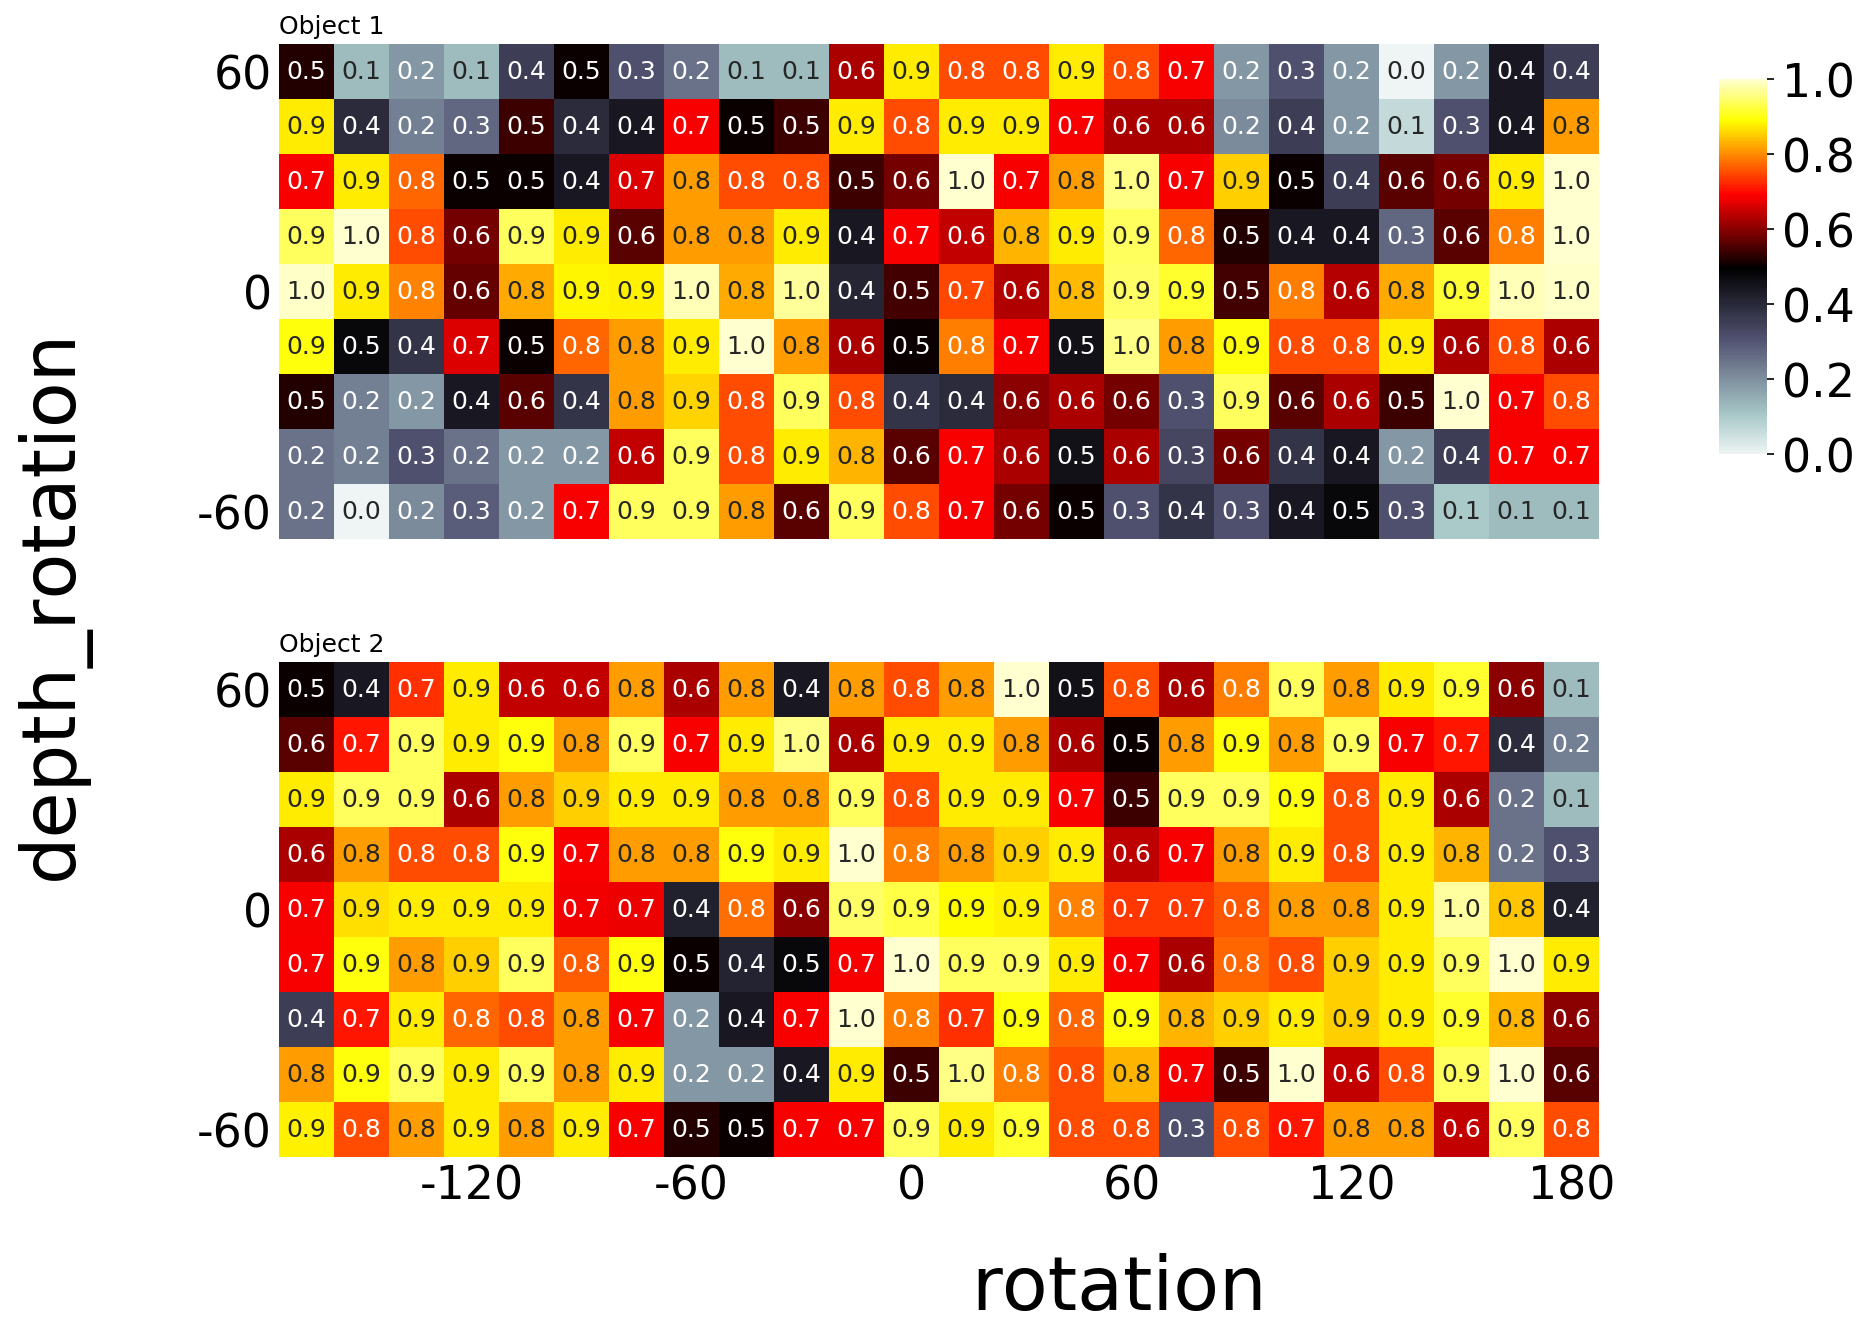

In [32]:
if curr_phase in [4, 5] and no_feedback_flag:
    curr_no_fb = no_feedback[animalid]
else:
    curr_no_fb = None
    
fw = min([ int(round(len(col_values)*1.2)), 16])
fh = len(object_ids)*5

annot=True
annot_str = '_annot_' if annot else ''

fig, axes = pl.subplots(2, 1, figsize=(fw, fh), 
                        dpi=dpi, sharex=True, sharey=True)

cbar_ax = fig.add_axes([0.75, 0.6, 0.02, 0.25])

hmap_d = HMAPS[animalid]
for oi, objectid in enumerate(object_ids):
    ax = axes[oi]
    hmap = np.nanmean(hmap_d[objectid], axis=-1)
    im = sns.heatmap(hmap, cmap=pnas_cmap, vmin=0, vmax=1, ax=ax,
                    cbar=oi==0, cbar_ax=0 if oi else cbar_ax, center=0.5, 
                     annot=annot, fmt=".1f",  annot_kws={"size": 12})

    format_size_depth_ticks(ax, xvals=col_values, yvals=row_values, xmax=xmax, ymax=ymax, seaborn=True)
    if curr_no_fb is not None:
        draw_no_feedback(ax, curr_no_fb, defaults, seaborn=True, lw=6)

    if annot:
        ax.set_title('Object %s' % objectid, fontsize=12, loc='left', pad=5)
    ax.tick_params(axis='both', size=0)

    ax.set_aspect('equal')
    ax.invert_yaxis()

if curr_no_fb is not None:
    ax.legend(bbox_to_anchor=(1.7, 1))

pl.subplots_adjust(hspace=0.2, wspace=0.1, right=0.7, left=0.15)

fig.text(0.5, 0.03, col_feature, ha='center', fontsize=36)
fig.text(0.04, 0.5, row_feature, va='center', rotation='vertical', fontsize=36)

figname = '%sheatmap_split-object_phase-%i_%s' % (annot_str, curr_phase, animalid)
print(figname)

#pl.savefig(os.path.join(curr_outdir, 'by_animal', '%s.svg' % figname))
pl.savefig(os.path.join(curr_outdir, 'by_animal', '%s.png' % figname))


In [921]:
outdir

'/n/coxfs01/behavior-data/threeport/processed/performance'

## Plot HEATMAP for all animals

In [47]:
plot_each_animal = True
transform_str = 'inplane_rotations' if curr_phase==6 else 'indepth_rotations'

#curr_outdir = os.path.join(processed_dir, 'performance', transform_str) #, 'by_animal')

if plot_each_animal:
    
    if not os.path.exists(os.path.join(curr_outdir, 'by_animal')):
        os.makedirs(os.path.join(curr_outdir, 'by_animal'))
print(os.path.join(curr_outdir, 'by_animal'))
                

/n/coxfs01/behavior-data/threeport/processed/GJ/phase-6/performance/by_animal


In [48]:
seaborn = True
annot=True

annot_str = '_annot_' if annot else ''

fw = min([len(col_values)*1.2, 16])
fh = len(object_ids)*5

if plot_each_animal:
    for ai, (animalid, hmap_d) in enumerate(HMAPS.items()):
        
        if curr_phase in [4, 5]:
            curr_no_fb = no_feedback[animalid]
        else:
            curr_no_fb = None

        fig, axes = pl.subplots(2, 1, figsize=(fw, fh), 
                                dpi=dpi, sharex=True, sharey=True)
        
        cbar_ax = fig.add_axes([0.7, 0.6, 0.02, 0.25])

        hmap_d = HMAPS[animalid]
        for oi, objectid in enumerate(object_ids):
            ax = axes[oi]
            hmap = np.nanmean(hmap_d[objectid], axis=-1)
            im = sns.heatmap(hmap, cmap=pnas_cmap, vmin=0, vmax=1, ax=ax,
                            cbar=oi==0, cbar_ax=0 if oi else cbar_ax, center=0.5, 
                             annot=annot, fmt=".1f",  annot_kws={"size": 12})

            format_size_depth_ticks(ax, xvals=col_values, yvals=row_values, xmax=xmax, ymax=ymax, seaborn=True)
            if curr_no_fb is not None:
                draw_no_feedback(ax, curr_no_fb, defaults, seaborn=True, lw=6)

            if annot:
                ax.set_title('Object %s' % objectid, fontsize=12, loc='left', pad=5)
            ax.tick_params(axis='both', size=0)

            ax.set_aspect('equal')
            ax.invert_yaxis()

        if curr_no_fb is not None:
            ax.legend(bbox_to_anchor=(1.7, 1))
            
        pl.subplots_adjust(hspace=0.2, wspace=0.1, right=0.7, left=0.15)

        fig.text(0.5, 0.03, col_feature, ha='center')
        fig.text(0.04, 0.5, row_feature, va='center', rotation='vertical')

        figname = '%sheatmap_split-object_phase-%i_%s' % (annot_str, curr_phase, animalid)
        print(figname)

        #pl.savefig(os.path.join(curr_outdir, 'by_animal', '%s.svg' % figname))
        pl.savefig(os.path.join(curr_outdir, 'by_animal', '%s.png' % figname))

        pl.close()

_annot_heatmap_split-object_phase-6_AJ12
_annot_heatmap_split-object_phase-6_AJ1
_annot_heatmap_split-object_phase-6_AJ4
_annot_heatmap_split-object_phase-6_AJ5
_annot_heatmap_split-object_phase-6_AG8
_annot_heatmap_split-object_phase-6_AG7
_annot_heatmap_split-object_phase-6_AG6
_annot_heatmap_split-object_phase-6_AG5
_annot_heatmap_split-object_phase-6_AG2
_annot_heatmap_split-object_phase-6_AG1


In [42]:
HMAPS.keys()

['AJ12', 'AJ1', 'AJ4', 'AJ5', 'AG8', 'AG7', 'AG6', 'AG5', 'AG2', 'AG1']

heatmap_split-object_phase-6_AG-AJ


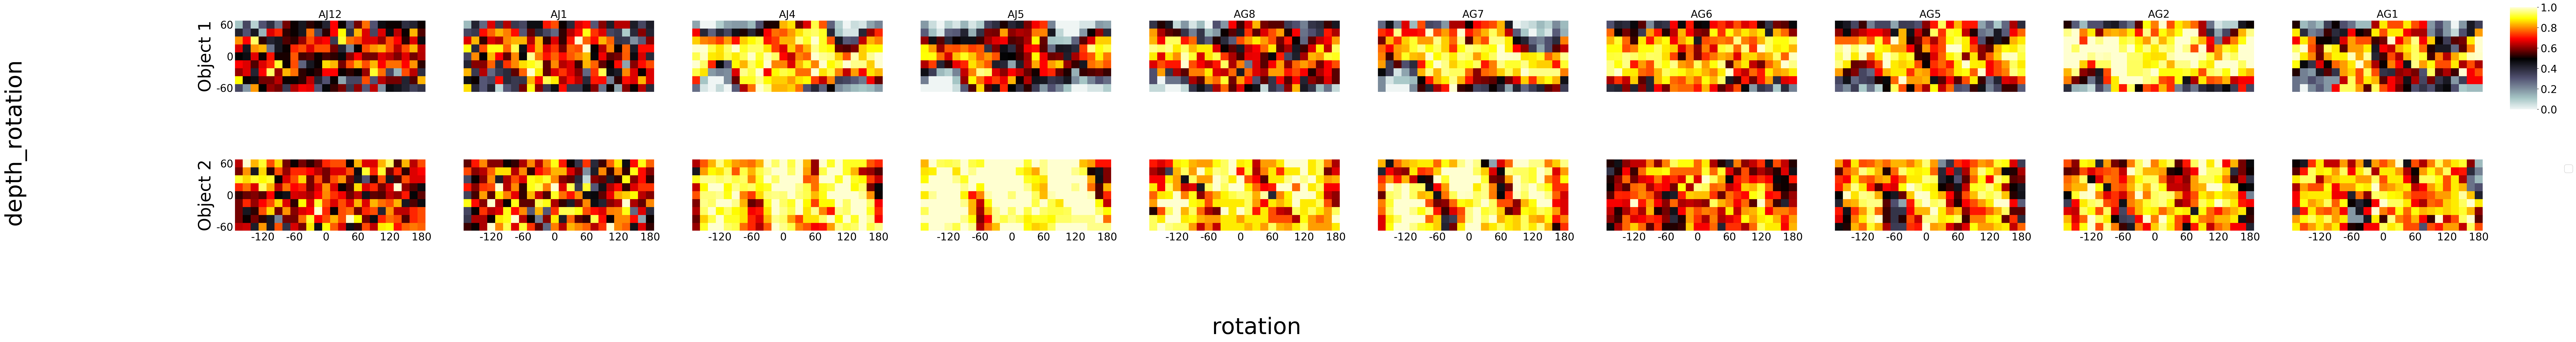

In [52]:
plot_each_animal=False
if not plot_each_animal:
    seaborn = True
    dpi=200

    fig, axes = pl.subplots(2, len(HMAPS.keys()), figsize=(len(animal_ids)*8, len(object_ids)*6), 
                            dpi=150, sharex=True, sharey=True)
    cbar_ax = fig.add_axes([0.96, 0.58, 0.01, 0.25])

    for ai, (animalid, hmap_d) in enumerate(HMAPS.items()):
        if curr_phase in [4, 5]:
            curr_no_fb = no_feedback[animalid]

        for oi, okey in enumerate(object_ids):
            ax = axes[oi, ai]
            hmap = np.nanmean(hmap_d[okey], axis=-1)
            if seaborn:
                im = sns.heatmap(hmap, cmap=pnas_cmap, vmin=0, vmax=1, ax=ax,
                                cbar=ai==0, cbar_ax=None if ai else cbar_ax)
            else:
                im = ax.imshow(hmap, origin='bottom', cmap=pnas_cmap, vmin=0, vmax=1)

            ax.set_aspect('equal')
            format_size_depth_ticks(ax, xvals=col_values, yvals=row_values, 
                                    xmax=xmax, ymax=ymax, seaborn=seaborn)
            if curr_phase in [4, 5]:
                draw_no_feedback(ax, curr_no_fb, defaults, seaborn=seaborn)
            #ax.set_title(animalid, fontsize=8, loc='left', pad=5)

            ax.tick_params(axis='both', size=0)
            if ai==0:
                ax.set_ylabel('Object %s' % okey)

            if seaborn:
                ax.invert_yaxis()
                
            if oi==0:
                ax.set_title(animalid)

    
    ax.legend(bbox_to_anchor=(1.5, 1))

    if not seaborn:
        cbar_ax = fig.add_axes([1.5, 0.58, 0.01, 0.25])
        fig.colorbar(im, cax=cbar_ax)

    pl.subplots_adjust(hspace=0.0, wspace=0.2, right=0.95, bottom=0.2)

    fig.text(0.5, 0.03, col_feature, ha='center', fontsize=48)
    fig.text(0.04, 0.5, row_feature, va='center', rotation='vertical', fontsize=48)


    figname = 'heatmap_split-object_phase-%i_%s' % (curr_phase, '-'.join(cohort_list))
    print(figname)

    #pl.savefig(os.path.join(curr_outdir, '%s.svg' % figname))
    pl.savefig(os.path.join(curr_outdir, '%s.png' % figname))
    #pl.close()

## Plot no-feedback performance only

In [64]:
curr_outdir = os.path.join(processed_dir, 'performance', 'no_feedback') #, 'by_animal')


In [65]:
twin_metric = 'avg_rt'
curr_metric = 'perc_correct'

dlist = []
incl_animals = [k for k, v in no_feedback.items() if len(v) > 0]
for animalid in incl_animals:
    fb_sizes = [f[0] for f in no_feedback[animalid]]
    fb_drots = [f[1] for f in no_feedback[animalid]]

    avg_accuracy = perfdf[(perfdf['animalid']==animalid) 
                   & (perfdf['size'].isin(fb_sizes)) 
                   & (perfdf['depth_rotation'].isin(fb_drots))].groupby(['session']).mean()[curr_metric]
    
    avg_rt = perfdf[(perfdf['animalid']==animalid) 
                   & (perfdf['size'].isin(fb_sizes)) 
                   & (perfdf['depth_rotation'].isin(fb_drots))].groupby(['session']).mean()[twin_metric]
    
    default_accuracy = perfdf[(perfdf['animalid']==animalid) 
                   & (perfdf['size']==default_size) 
                   & (perfdf['depth_rotation']==default_depth_rotation)].groupby(['session']).mean()[curr_metric]
    
    default_rt = perfdf[(perfdf['animalid']==animalid) 
                   & (perfdf['size']==default_size) 
                   & (perfdf['depth_rotation']==default_depth_rotation)].groupby(['session']).mean()[twin_metric]
    
    relative_accuracy = []
    dlist.append(pd.DataFrame({'mean_accuracy': avg_accuracy,
                              'mean_rt': avg_rt,
                               'default_accuracy': default_accuracy,
                               'default_rt': default_rt,
                              'animalid': [animalid for _ in np.arange(0, len(avg_rt))]}))
    
fb_df = pd.concat(dlist, axis=0).reset_index(drop=True)


In [66]:
fb_df['relative_accuracy'] = fb_df['mean_accuracy'] / fb_df['default_accuracy']
fb_df['relative_rt'] = fb_df['mean_rt'] / fb_df['default_rt']


fb_df = fb_df.replace([np.inf, -np.inf], np.nan).dropna()

fb_animal_ids = sorted(fb_df['animalid'].unique(), key=util.natural_keys)


no_feedback_mean_accuracy-by-animal_AJ


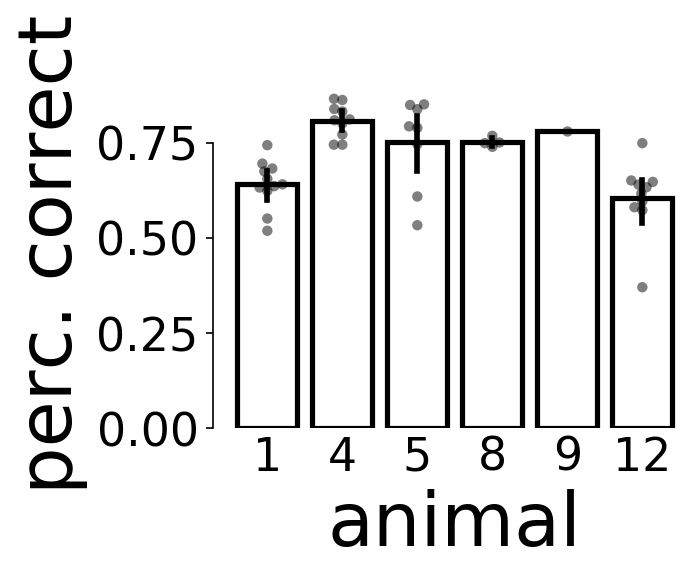

In [71]:
fig, ax = pl.subplots(dpi=dpi, figsize=(5,4))

curr_metric = 'mean_accuracy'
sns.barplot(x='animalid', y=curr_metric, order=fb_animal_ids,
            data=fb_df, ax=ax, 
            linewidth=2.5, facecolor=(1, 1, 1, 0),
            errcolor='k', edgecolor='k')
sns.swarmplot(x='animalid', y=curr_metric,  order=fb_animal_ids,
              data=fb_df, ax=ax, color='k', alpha=0.5)
ax.tick_params(axis='x', size=0)

sns.despine(trim=True, offset=8, bottom=True)

ax.set_xticklabels([int(a[2:]) for a in fb_animal_ids])
pl.subplots_adjust(left=0.3, right=0.9, bottom=0.3)
if 'accuracy' in curr_metric:
    ax.set_ylabel('perc. correct')
else:
    ax.set_ylabel('reaction time (s)')
ax.set_xlabel('animal')

figname = 'no_feedback_%s-by-animal_%s' % (curr_metric, cohort)
print(figname)

pl.savefig(os.path.join(curr_outdir, '%s.png' % figname))


In [703]:
[int(a[2:]) for a in fb_animal_ids]

[1, 2, 3, 4, 5, 7, 8]

# General performance and RT